In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc
import shutil

In [2]:
import librosa
import librosa.display
import IPython.display as ipd

# Sample Trial

In [3]:
sample = r"D:\GTZAN new dataset\3sec audios\blues\blues.00000.chunk1.wav"

In [4]:
ipd.Audio(sample)

In [5]:
scale, sr = librosa.load(sample)

In [6]:
filter_banks = librosa.filters.mel(n_fft=512, sr=sr, n_mels=64)

In [7]:
filter_banks.shape

(64, 257)

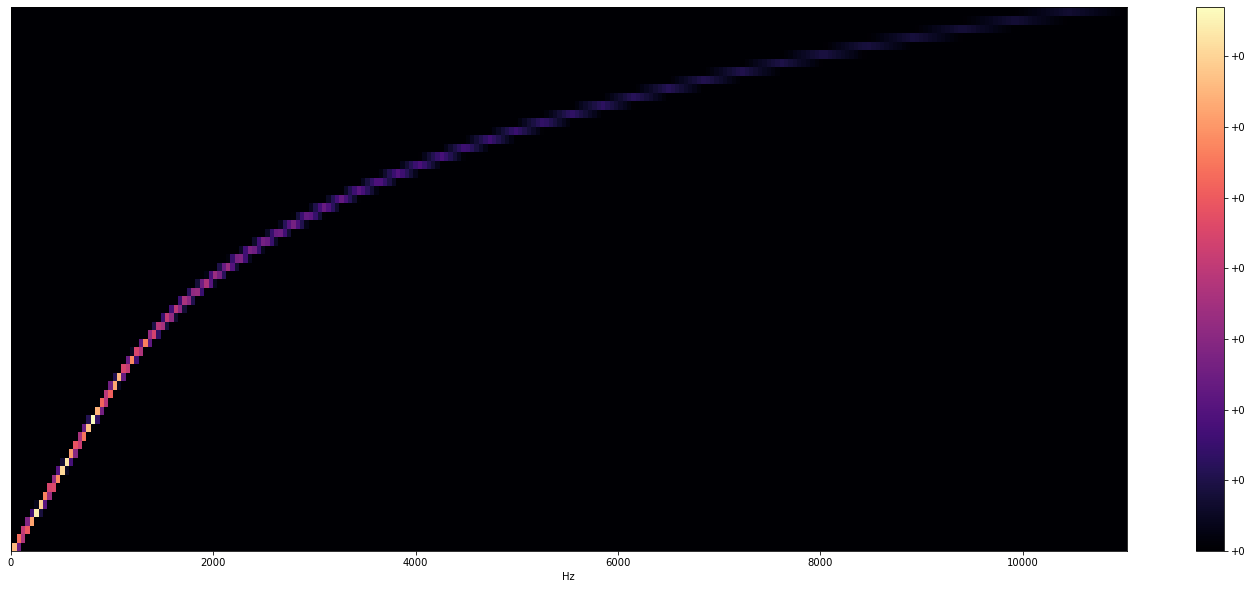

In [8]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks, 
                         sr=sr, 
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

In [14]:
mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=512, hop_length=256, n_mels=64)

In [15]:
mel_spectrogram.shape

(64, 260)

In [16]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

In [17]:
log_mel_spectrogram.shape

(64, 260)

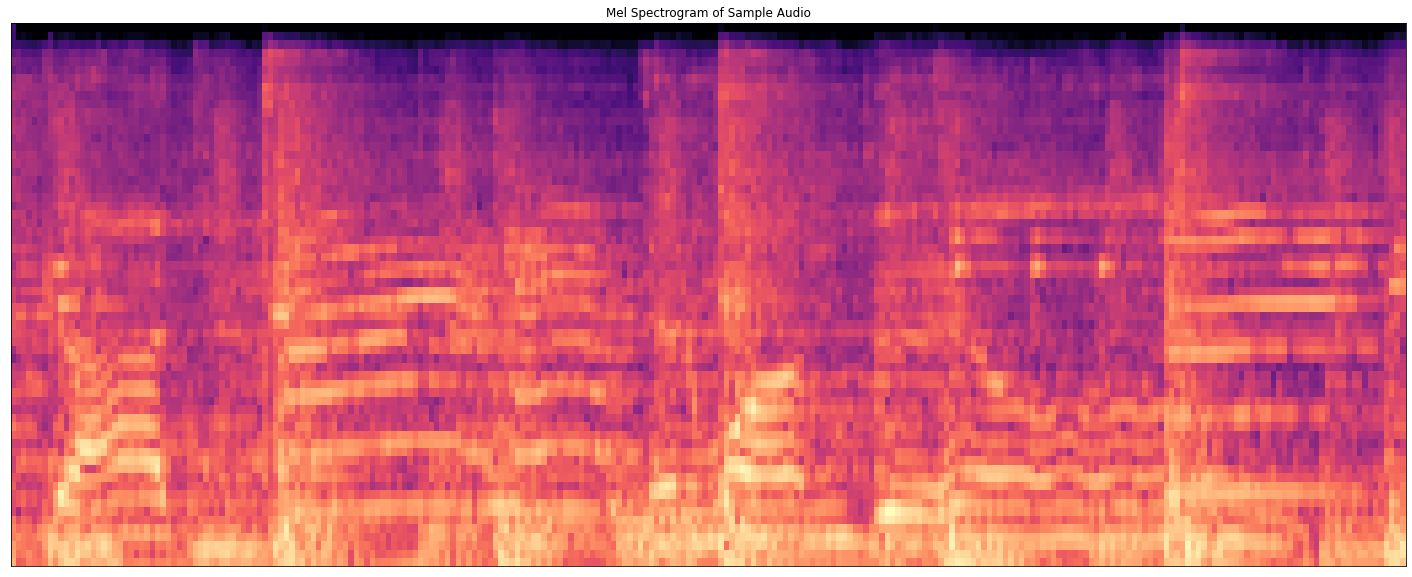

In [18]:
fig = plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,  
                         sr=sr,
                         cmap='magma',
                        )
plt.title("Mel Spectrogram of Sample Audio")
fig.savefig(r"D:\GTZAN new dataset\sample.png", dpi=200, transparent = True)

## Data Creation:
### Creating Mel Spectrograms for Each Genre

In [19]:
data = pd.read_csv(r"D:\GTZAN sample\Data\features_30_sec.csv") 
df = pd.DataFrame(data)
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [20]:
newdata = "D:/GTZAN sample/Data/genres_original/"+df["label"]+"/"+df["filename"]
df["audio path"] = newdata

In [22]:
df.head(3)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,audio path
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues,D:/GTZAN sample/Data/genres_original/blues/blu...
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues,D:/GTZAN sample/Data/genres_original/blues/blu...
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues,D:/GTZAN sample/Data/genres_original/blues/blu...


In [23]:
labels = set(df["label"])

trainpath = "D:/GTZAN new dataset/train/"
if not os.path.exists(trainpath):
    os.makedirs(trainpath)
for i in labels:
    if not os.path.exists(trainpath+i):
        os.makedirs(trainpath+i)

testpath = "D:/GTZAN new dataset/test/"
if not os.path.exists(testpath):
    os.makedirs(testpath)
for i in labels:
    if not os.path.exists(testpath+i):
        os.makedirs(testpath+i)
        
audiopath = "D:/GTZAN new dataset/3sec audios/"
if not os.path.exists(audiopath):
    os.makedirs(audiopath)
for i in labels:
    if not os.path.exists(audiopath+i):
        os.makedirs(audiopath+i)

In [24]:
#creating 3sec chunks out of the 30sec audio
from pydub import AudioSegment
from pydub.utils import make_chunks
j = 0
for audio in df["audio path"]:
    myaudio = AudioSegment.from_file(audio , "wav") 
    chunk_length_ms = 3010 # pydub calculates in millisec
    chunks = make_chunks(myaudio, chunk_length_ms) # make chunks of one sec

    #Export all of the individual chunks as wav files

    for i, chunk in enumerate(chunks):
        chunk_name = os.path.join(audiopath, df["label"][j],df["filename"][j][:-3]+"chunk{0}.wav".format(i))
        chunk.export(chunk_name, format="wav")
    j+=1

D:\anaconda\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [25]:
genres = os.listdir(trainpath)
genres

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

blues spectrograms extracted
classical spectrograms extracted
country spectrograms extracted
disco spectrograms extracted
hiphop spectrograms extracted
jazz spectrograms extracted
metal spectrograms extracted
pop spectrograms extracted
reggae spectrograms extracted
rock spectrograms extracted


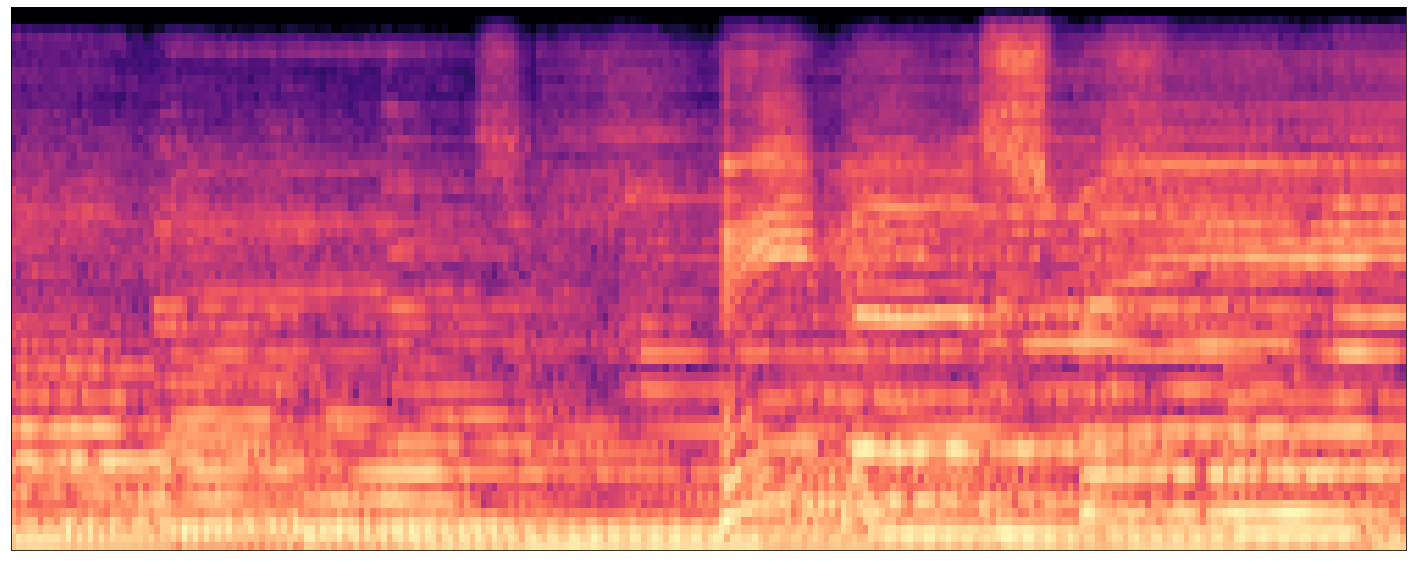

In [144]:
fig = plt.figure(figsize=(25, 10))
for genre in genres:
    for audio in os.listdir(os.path.join(audiopath,genre)):
        path = os.path.join(trainpath,genre,audio[:-3]+"png")
        if not os.path.exists(path):  
            scale, sr = librosa.load(os.path.join(audiopath,genre,audio))
            filter_banks = librosa.filters.mel(n_fft=512, sr=sr, n_mels=64)
            mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_fft=512, hop_length=256, n_mels=64)
            log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)
            librosa.display.specshow(log_mel_spectrogram,sr=sr,cmap='magma')
            fig.savefig(path, dpi=200)
    print(genre,"spectrograms extracted")

## Building CNN model

In [31]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [148]:
#creating validation set by randomly picking 10% data from every genre
import random
for genre in genres:
    filenames = os.listdir(os.path.join(trainpath,f"{genre}"))
    random.shuffle(filenames)
    test_files = filenames[0:100]
    for f in test_files:
        shutil.move(trainpath + f"{genre}"+ "/" + f,testpath + f"{genre}")

In [35]:
#data generators to create train and test datasets with genres as labels
datapath = "D:/GTZAN new dataset/"
image_gen = ImageDataGenerator(rescale=1./255.)
batch_size = 10
train_flow = image_gen.flow_from_directory(
    datapath+"train/", target_size=(128,513), batch_size=batch_size, class_mode='categorical'
)
test_flow = image_gen.flow_from_directory(
    datapath + "test/", target_size=(128,513), batch_size=1, shuffle=False, class_mode='categorical'
)

Found 9040 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [27]:
#custom CNN model

input_shape = (128,513,3)
epsilon=0.001
num_classes = 10

model = Sequential()
model.add(BatchNormalization(input_shape=input_shape))
model.add(Conv2D(filters=16, kernel_size=3, activation= 'relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 128, 513, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 513, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 256, 16)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 256, 16)       64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 256, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 128, 32)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 128, 32)       1

In [155]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer= "adam", metrics=['accuracy'])

In [156]:
train_steps = 9040//10
val_steps = 1000//10
history = model.fit_generator(
    train_flow,
    epochs =20,
    steps_per_epoch = train_steps,
    validation_data = test_flow,
    validation_steps = val_steps
)

Epoch 1/20
904/904 [==============================] - 1468s 2s/step - loss: 4.8921 - accuracy: 0.3237 - val_loss: 4.6003 - val_accuracy: 0.1700
Epoch 2/20
904/904 [==============================] - 1341s 1s/step - loss: 2.0063 - accuracy: 0.5788 - val_loss: 1.5003 - val_accuracy: 0.6300
Epoch 3/20
904/904 [==============================] - 1388s 2s/step - loss: 1.1559 - accuracy: 0.6930 - val_loss: 0.7149 - val_accuracy: 0.7400
Epoch 4/20
904/904 [==============================] - 1410s 2s/step - loss: 0.7114 - accuracy: 0.7852 - val_loss: 1.3701 - val_accuracy: 0.6200
Epoch 5/20
904/904 [==============================] - 1403s 2s/step - loss: 0.5165 - accuracy: 0.8406 - val_loss: 2.0828 - val_accuracy: 0.4900
Epoch 6/20
904/904 [==============================] - 1413s 2s/step - loss: 0.3292 - accuracy: 0.8849 - val_loss: 1.4225 - val_accuracy: 0.6500
Epoch 7/20
904/904 [==============================] - 1369s 2s/step - loss: 0.2667 - accuracy: 0.9078 - val_loss: 1.4130 - val_accuracy:

In [157]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [164]:
def plot_loss(epochs, loss, val_loss):
    plt.plot(epochs, loss, 'bo', label='Training Loss')
    plt.plot(epochs, val_loss, 'orange', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
def plot_accuracy(epochs, acc, val_acc):
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'orange', label = 'Validation accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

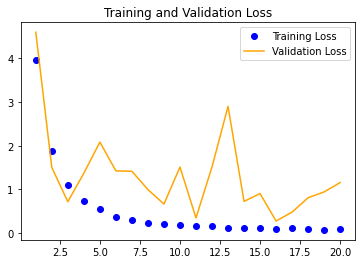

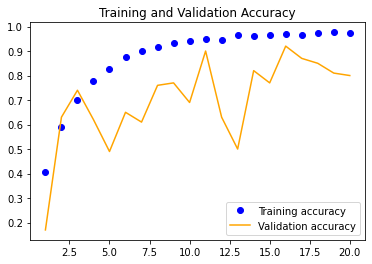

In [165]:
plot_loss(range(1, len(loss) + 1), loss, val_loss)
plot_accuracy(range(1, len(loss) + 1), acc, val_acc)

In [166]:
model.save("using_3s_audios.h5")

In [37]:
model = tf.keras.models.load_model("using_3s_audios.h5")

In [38]:
y_pred = model.predict(test_flow)
y_test = test_flow.classes

In [41]:
loss, acc = model.evaluate(test_flow, verbose=1)

1000/1000 [==============================] - 136s 133ms/step - loss: 1.0304 - accuracy: 0.8000


In [42]:
loss, acc

(1.0304372310638428, 0.800000011920929)